# Challenge Data - Football: qui va gagner ?

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
base_path = './data'

path_player_away_train = f'{base_path}/Train_Data/train_away_player_statistics_df.csv'
path_player_home_train = f'{base_path}/Train_Data/train_home_player_statistics_df.csv'
path_team_away_train = f'{base_path}/Train_Data/train_away_team_statistics_df.csv'
path_team_home_train = f'{base_path}/Train_Data/train_home_team_statistics_df.csv'

path_player_away_test = f'{base_path}/Test_Data/test_away_player_statistics_df.csv'

path_target = f'{base_path}/Y_train_1rknArQ.csv'
path_target_sup = f'{base_path}/benchmark_and_extras/Y_train_supp.csv'

## Exploration des données

### Lecture des données

In [6]:
train_team_home = pd.read_csv(path_team_home_train, sep=',')
train_team_away = pd.read_csv(path_team_away_train, sep=',')

train_player_away = pd.read_csv(path_player_away_train, sep=',')
train_player_home = pd.read_csv(path_player_home_train, sep=',')

train_target = pd.read_csv(path_target, sep=',')
train_target_sup = pd.read_csv(path_target_sup, sep=',')

### Analyse des données des équipes

In [9]:
train_team_home.info()
print()
train_team_away.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12303 entries, 0 to 12302
Columns: 143 entries, ID to TEAM_GOALS_5_last_match_std
dtypes: float64(140), int64(1), object(2)
memory usage: 13.4+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12303 entries, 0 to 12302
Columns: 143 entries, ID to TEAM_GOALS_5_last_match_std
dtypes: float64(140), int64(1), object(2)
memory usage: 13.4+ MB


On va combiner les données des équipes

In [10]:
train_team_home.columns = 'HOME_' + train_team_home.columns
train_team_away.columns = 'AWAY_' + train_team_away.columns

In [11]:
train_team = pd.merge(train_team_home, train_team_away, left_on='HOME_ID', right_on='AWAY_ID', how='inner')

train_team['ID'] = train_team['HOME_ID'].combine_first(train_team['AWAY_ID'])

train_team = train_team.drop(columns=['HOME_ID', 'AWAY_ID'])

train_team.insert(0, 'ID', train_team.pop('ID'))
train_team.head()

,ID,HOME_LEAGUE,HOME_TEAM_NAME,HOME_TEAM_SHOTS_TOTAL_season_sum,HOME_TEAM_SHOTS_INSIDEBOX_season_sum,HOME_TEAM_SHOTS_OFF_TARGET_season_sum,HOME_TEAM_SHOTS_ON_TARGET_season_sum,HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum,HOME_TEAM_PASSES_season_sum,HOME_TEAM_SUCCESSFUL_PASSES_season_sum,...,AWAY_TEAM_YELLOWCARDS_5_last_match_std,AWAY_TEAM_REDCARDS_5_last_match_std,AWAY_TEAM_OFFSIDES_5_last_match_std,AWAY_TEAM_ATTACKS_5_last_match_std,AWAY_TEAM_PENALTIES_5_last_match_std,AWAY_TEAM_SUBSTITUTIONS_5_last_match_std,AWAY_TEAM_BALL_SAFE_5_last_match_std,AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_std,AWAY_TEAM_INJURIES_5_last_match_std,AWAY_TEAM_GOALS_5_last_match_std
0,0,Ligue 1,Toulouse,3.0,2.0,5.0,2.0,1.0,2.0,2.0,...,5.0,5.0,4.0,0.0,6.0,8.0,4.0,3.0,2.0,3.0
1,1,Ligue 2,Brest,6.0,8.0,3.0,6.0,5.0,8.0,7.0,...,0.0,0.0,3.0,1.0,8.0,4.0,10.0,0.0,5.0,3.0
2,2,Serie A,Sampdoria,4.0,2.0,5.0,2.0,8.0,1.0,1.0,...,6.0,10.0,4.0,4.0,0.0,8.0,3.0,0.0,9.0,6.0
3,3,League One,Coventry City,7.0,5.0,5.0,6.0,6.0,9.0,9.0,...,0.0,0.0,1.0,2.0,0.0,5.0,6.0,3.0,NaN,2.0
4,4,Premier League,Wolverhampton Wanderers,3.0,3.0,2.0,3.0,4.0,4.0,3.0,...,1.0,0.0,4.0,4.0,9.0,4.0,1.0,4.0,6.0,5.0


In [12]:
print(f'Dimension du dataset: {train_team.shape}')

Dimension du dataset: (12303, 285)


In [32]:
train_team

,ID,HOME_LEAGUE,HOME_TEAM_NAME,HOME_TEAM_SHOTS_TOTAL_season_sum,HOME_TEAM_SHOTS_INSIDEBOX_season_sum,HOME_TEAM_SHOTS_OFF_TARGET_season_sum,HOME_TEAM_SHOTS_ON_TARGET_season_sum,HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum,HOME_TEAM_PASSES_season_sum,HOME_TEAM_SUCCESSFUL_PASSES_season_sum,...,AWAY_TEAM_YELLOWCARDS_5_last_match_std,AWAY_TEAM_REDCARDS_5_last_match_std,AWAY_TEAM_OFFSIDES_5_last_match_std,AWAY_TEAM_ATTACKS_5_last_match_std,AWAY_TEAM_PENALTIES_5_last_match_std,AWAY_TEAM_SUBSTITUTIONS_5_last_match_std,AWAY_TEAM_BALL_SAFE_5_last_match_std,AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_std,AWAY_TEAM_INJURIES_5_last_match_std,AWAY_TEAM_GOALS_5_last_match_std
0,0,Ligue 1,Toulouse,3.0,2.0,5.0,2.0,1.0,2.0,2.0,...,5.0,5.0,4.0,0.0,6.0,8.0,4.0,3.0,2.0,3.0
1,1,Ligue 2,Brest,6.0,8.0,3.0,6.0,5.0,8.0,7.0,...,0.0,0.0,3.0,1.0,8.0,4.0,10.0,0.0,5.0,3.0
2,2,Serie A,Sampdoria,4.0,2.0,5.0,2.0,8.0,1.0,1.0,...,6.0,10.0,4.0,4.0,0.0,8.0,3.0,0.0,9.0,6.0
3,3,League One,Coventry City,7.0,5.0,5.0,6.0,6.0,9.0,9.0,...,0.0,0.0,1.0,2.0,0.0,5.0,6.0,3.0,NaN,2.0
4,4,Premier League,Wolverhampton Wanderers,3.0,3.0,2.0,3.0,4.0,4.0,3.0,...,1.0,0.0,4.0,4.0,9.0,4.0,1.0,4.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12298,12298,League One,Southend United,4.0,2.0,3.0,4.0,7.0,4.0,4.0,...,5.0,5.0,0.0,1.0,6.0,10.0,1.0,1.0,NaN,2.0
12299,12299,Liga Portugal,Boavista,4.0,2.0,3.0,1.0,5.0,1.0,1.0,...,7.0,5.0,2.0,2.0,0.0,0.0,1.0,6.0,9.0,1.0
12300,12300,Bundesliga,Schalke 04,4.0,3.0,5.0,3.0,5.0,1.0,1.0,...,8.0,0.0,3.0,2.0,0.0,0.0,6.0,3.0,4.0,4.0
12301,12301,League One,Fleetwood Town,2.0,NaN,1.0,1.0,NaN,NaN,NaN,...,2.0,0.0,NaN,0.0,8.0,3.0,1.0,2.0,NaN,6.0


In [33]:
train_target

,ID,HOME_WINS,DRAW,AWAY_WINS
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,3,1,0,0
4,4,0,1,0
...,...,...,...,...
12298,12298,0,0,1
12299,12299,0,0,1
12300,12300,0,0,1
12301,12301,1,0,0


#### Analyse des données manquantes

En analysant les données manquantes sur les colonnes, on voit que la colonne avec le plus de données manquantes a un percentage de 27% de données manquantes 

In [13]:
column_missing_values = train_team.isna().mean().sort_values(ascending=False)
column_missing_values

HOME_TEAM_INJURIES_5_last_match_std                0.269690
AWAY_TEAM_INJURIES_5_last_match_std                0.269284
AWAY_TEAM_INJURIES_5_last_match_sum                0.238397
HOME_TEAM_INJURIES_5_last_match_sum                0.238316
AWAY_TEAM_INJURIES_5_last_match_average            0.238316
                                                     ...   
AWAY_TEAM_SHOTS_ON_TARGET_5_last_match_std         0.000000
AWAY_TEAM_SHOTS_OFF_TARGET_5_last_match_average    0.000000
AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_std       0.000000
ID                                                 0.000000
HOME_LEAGUE                                        0.000000
Length: 285, dtype: float64

In [14]:
print(f'Percentage de colonnes avec de données manquantes: {len(column_missing_values[column_missing_values > 0])*100/len(column_missing_values):.3f} %')

Percentage de colonnes avec de données manquantes: 82.807 %


En analysant sur les lignes, on voit qu'on a des lignes avec beaucoup de données manquantes (> 50%)

In [15]:
row_missing_values = train_team.isna().mean(axis=1).sort_values(ascending=False)
row_missing_values

5646     0.547368
10163    0.547368
4624     0.435088
835      0.428070
8538     0.428070
           ...   
12272    0.000000
12271    0.000000
12275    0.000000
18       0.000000
15       0.000000
Length: 12303, dtype: float64

In [16]:
print(f'Percentage de lignes avec de données manquantes: {len(row_missing_values[row_missing_values > 0])*100/len(row_missing_values):.3f} %')

Percentage de lignes avec de données manquantes: 32.838 %


On ne va pas enlever des lignes/colonnes pour ne pas prendre le risque de perdre des informations avec cette opération

Comme la colonne avec le plus de données manquantes a environ 27% de données manquantes, on va performer une imputation des données

On considère qu'on va avoir suffisament des données pour faire cette imputation sans inserer beaucoup de biais

On va faire ça au moment de réaliser l'entraînement

On enregistre le fichier fusionné

In [17]:
train_team.to_csv('train_team.csv', index=False)

### Analyse des données des joeurs

In [4]:
train_player_away.head()

,ID,LEAGUE,TEAM_NAME,POSITION,PLAYER_NAME,PLAYER_ACCURATE_CROSSES_season_sum,PLAYER_ACCURATE_PASSES_season_sum,PLAYER_AERIALS_WON_season_sum,PLAYER_ASSISTS_season_sum,PLAYER_BIG_CHANCES_CREATED_season_sum,...,PLAYER_STARTING_LINEUP_5_last_match_std,PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std,PLAYER_TACKLES_5_last_match_std,PLAYER_TOTAL_CROSSES_5_last_match_std,PLAYER_TOTAL_DUELS_5_last_match_std,PLAYER_YELLOWCARDS_5_last_match_std,PLAYER_PUNCHES_5_last_match_std,PLAYER_LONG_BALLS_5_last_match_std,PLAYER_LONG_BALLS_WON_5_last_match_std,PLAYER_SHOTS_OFF_TARGET_5_last_match_std
0,0,Ligue 1,Olympique Marseille,defender,Lucas Perrin,0.0,19.0,20.0,0.0,0.0,...,70.0,30.0,46.0,0.0,79.0,99.0,NaN,NaN,NaN,NaN
1,0,Ligue 1,Olympique Marseille,midfielder,Kevin Strootman,2.0,48.0,19.0,28.0,8.0,...,77.0,0.0,40.0,6.0,46.0,77.0,NaN,NaN,NaN,NaN
2,0,Ligue 1,Olympique Marseille,goalkeeper,Yohann Pelé,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,0,Ligue 1,Olympique Marseille,defender,Abdallah Ali Mohamed,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Ligue 1,Olympique Marseille,NaN,Nemanja Radonjic,8.0,11.0,4.0,0.0,0.0,...,77.0,69.0,21.0,13.0,66.0,0.0,NaN,NaN,NaN,NaN


In [5]:
print('dimension of the dataset:', train_player_away.shape)
print()
train_player_away.info()

dimension of the dataset: (236132, 307)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236132 entries, 0 to 236131
Columns: 307 entries, ID to PLAYER_SHOTS_OFF_TARGET_5_last_match_std
dtypes: float64(302), int64(1), object(4)
memory usage: 553.1+ MB


#### Analyse des données manquantes

In [9]:
col_missing_paway = train_player_away.isna().mean().sort_values(ascending=False)
col_missing_paway

PLAYER_SHOTS_OFF_TARGET_5_last_match_std    1.000000
PLAYER_LONG_BALLS_WON_5_last_match_std      1.000000
PLAYER_CAPTAIN_5_last_match_std             1.000000
PLAYER_SHOTS_OFF_TARGET_season_sum          1.000000
PLAYER_CAPTAIN_season_average               1.000000
                                              ...   
PLAYER_YELLOWCARDS_season_sum               0.016216
TEAM_NAME                                   0.000000
PLAYER_NAME                                 0.000000
LEAGUE                                      0.000000
ID                                          0.000000
Length: 307, dtype: float64

Nous remarquons un nombre important des colonnes avec des données manquantes

In [10]:
print(f'Percentage de colonnes avec de données manquantes: {len(col_missing_paway[col_missing_paway > 0])*100/len(col_missing_paway):.3f} %')

Percentage de colonnes avec de données manquantes: 98.697 %


/tmp/ipykernel_8811/2000922539.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top30_misv.index, rotation=45, ha='right')


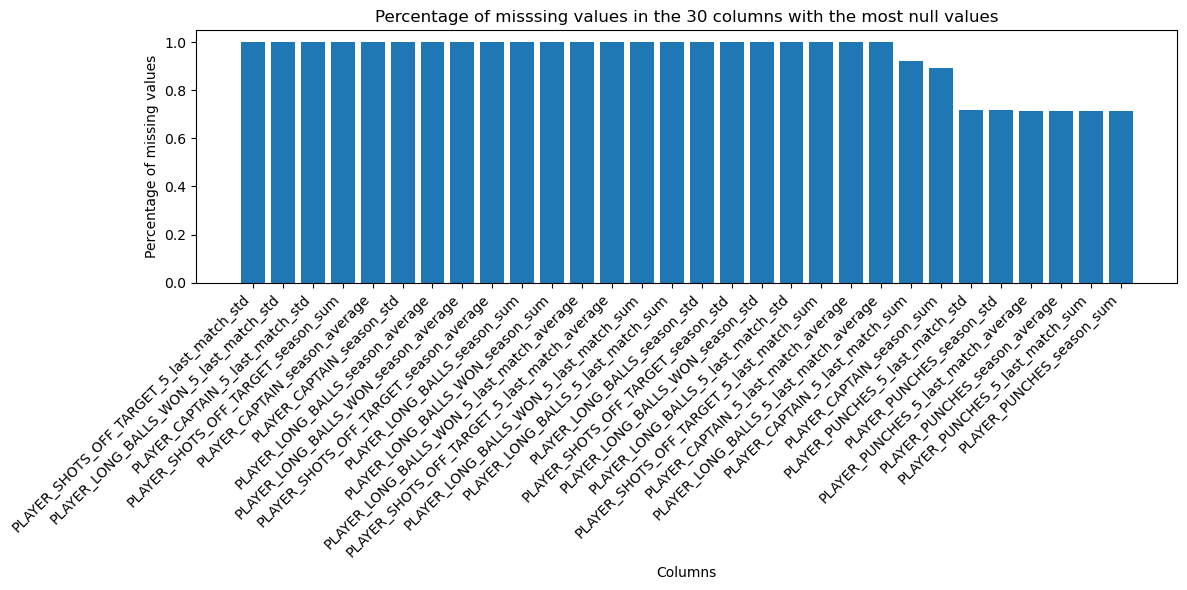

In [11]:
top30_misv = col_missing_paway.head(30)
fig, ax = plt.subplots(figsize = (12, 6))
ax.bar(top30_misv.index, top30_misv)
ax.set_xticklabels(top30_misv.index, rotation=45, ha='right')
ax.set_xlabel('Columns')
ax.set_ylabel('Percentage of missing values')
ax.set_title('Percentage of misssing values in the 30 columns with the most null values')
plt.tight_layout()
plt.show()

On efface les colonnés où il a plus de 30% de données manquantes

In [ ]:
cols_drop_away = col_missing_paway[col_missing_paway > 0.3].index
train_paway_clean = train_player_away.drop(columns=cols_drop_away)
print('Shape initiale:', train_player_away.shape)
print('Shape finale:',train_paway_clean.shape)

Shape initiale: (236132, 307)
Shape finale: (236132, 274)


Analyse sur les lignes

In [7]:
row_missing_paway = train_player_away.isna().mean(axis=1).sort_values(ascending=False)
row_missing_paway

127311    0.986971
92811     0.986971
92826     0.986971
102602    0.986971
221016    0.986971
            ...   
177082    0.071661
25758     0.071661
142630    0.071661
142644    0.071661
142653    0.071661
Length: 236132, dtype: float64

In [15]:
print(f'Percentage de lignes avec de données manquantes: {len(row_missing_paway[row_missing_paway > 0])*100/len(row_missing_paway):.3f} %')

Percentage de lignes avec de données manquantes: 100.000 %


**Nous avons une quantité importante des données manquantes sur chaque ligne**

Dans ce cas, nous analysons les données de test des joeurs

In [8]:
test_player_away = pd.read_csv(path_player_away_test, sep=',')

In [9]:
row_missing_paway_test = test_player_away.isna().mean(axis=1).sort_values(ascending=False)
row_missing_paway_test

261581    0.996711
261601    0.996711
262016    0.996711
23908     0.996711
504028    0.996711
            ...   
161684    0.013158
161681    0.013158
179727    0.013158
179698    0.013158
488808    0.013158
Length: 504626, dtype: float64

In [10]:
print(f'Percentage de lignes avec de données manquantes: {len(row_missing_paway_test[row_missing_paway_test > 0])*100/len(row_missing_paway_test):.3f} %')

Percentage de lignes avec de données manquantes: 100.000 %


Nous remarquons que dans les données de test il y a également beaucoup de données manquantes, avec des lignes qui manquent plus de 90% des données. 

Dans ce cas, une imputation de données n'a pas du sense car dans certains cas nous allons imputer presque toute la ligne. Donc, nous n'allons pas utiliser les données des joeurs dans nos modèles.

## Entraînement de modèles

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from xgboost import XGBClassifier, plot_importance
from lightgbm import LGBMClassifier

In [3]:
base_path = './data'
path_data = './train_team.csv'
path_target = f'{base_path}/Y_train_1rknArQ.csv'

data = pd.read_csv(path_data, sep=',')
target = pd.read_csv(path_target, sep=',')

### Séparation train/test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns=['ID', 'HOME_LEAGUE', 'HOME_TEAM_NAME', 'AWAY_LEAGUE', 'AWAY_TEAM_NAME']), 
    target, 
    test_size=0.2, 
    random_state=42,
    shuffle=True
    )

In [5]:
print(f"Nombre de données d'entrainement: {X_train.shape[0]}")
print(f"Nombre de données de test: {X_test.shape[0]}")

Nombre de données d'entrainement: 9842
Nombre de données de test: 2461


### Imputation et standardisation des données

In [6]:
imputer = SimpleImputer(strategy='median')
X_train_imp = imputer.fit_transform(X_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imp)

Label Encoding de la variable cible (ça sera utile pour certaines modèles)

In [7]:
y_train_encoded = y_train.drop(columns='ID').apply(lambda x: np.where(x.to_numpy() == 1)[0][0], axis=1)
y_test_encoded = y_test.drop(columns='ID').apply(lambda x: np.where(x.to_numpy() == 1)[0][0], axis=1)

### K-Nearest Neighbors

Nous allons performer un grid search sur differents nombres de voisins et différents métriques

In [8]:
n_neighbors = np.arange(5, 150, 5)
param_grid_knn = {
    'n_neighbors': n_neighbors,
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

knn = KNeighborsClassifier(n_jobs=-1)

gs_knn = GridSearchCV(knn, param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=10).fit(X_train_scaled, y_train_encoded)

Fitting 5 folds for each of 87 candidates, totalling 435 fits


[CV 1/5; 1/87] START metric=euclidean, n_neighbors=5............................
[CV 3/5; 1/87] START metric=euclidean, n_neighbors=5............................
[CV 1/5; 2/87] START metric=euclidean, n_neighbors=10...........................
[CV 2/5; 2/87] START metric=euclidean, n_neighbors=10...........................
[CV 2/5; 1/87] START metric=euclidean, n_neighbors=5............................
[CV 5/5; 1/87] START metric=euclidean, n_neighbors=5............................
[CV 4/5; 1/87] START metric=euclidean, n_neighbors=5............................
[CV 3/5; 2/87] START metric=euclidean, n_neighbors=10...........................
[CV 3/5; 1/87] END metric=euclidean, n_neighbors=5;, score=0.416 total time=   1.3s
[CV 1/5; 1/87] END metric=euclidean, n_neighbors=5;, score=0.430 total time=   1.4s
[CV 2/5; 2/87] END metric=euclidean, n_neighbors=10;, score=0.440 total time=   1.3s
[CV 1/5; 2/87] END metric=euclidean, n_neighbors=10;, score=0.447 total time=   1.3s
[CV 4/5; 2/87]

/home/leonardo/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [9]:
best_params_knn = gs_knn.best_params_
X_test_scaled = scaler.transform(imputer.transform(X_test))
score_knn = gs_knn.score(X_test_scaled, y_test_encoded)

print(f'{best_params_knn=}')
print(f'{score_knn=}')

best_params_knn={'metric': 'euclidean', 'n_neighbors': 120}
score_knn=0.48720032507110933


Text(0.5, 1.0, 'KNN - metric: chebyshev')

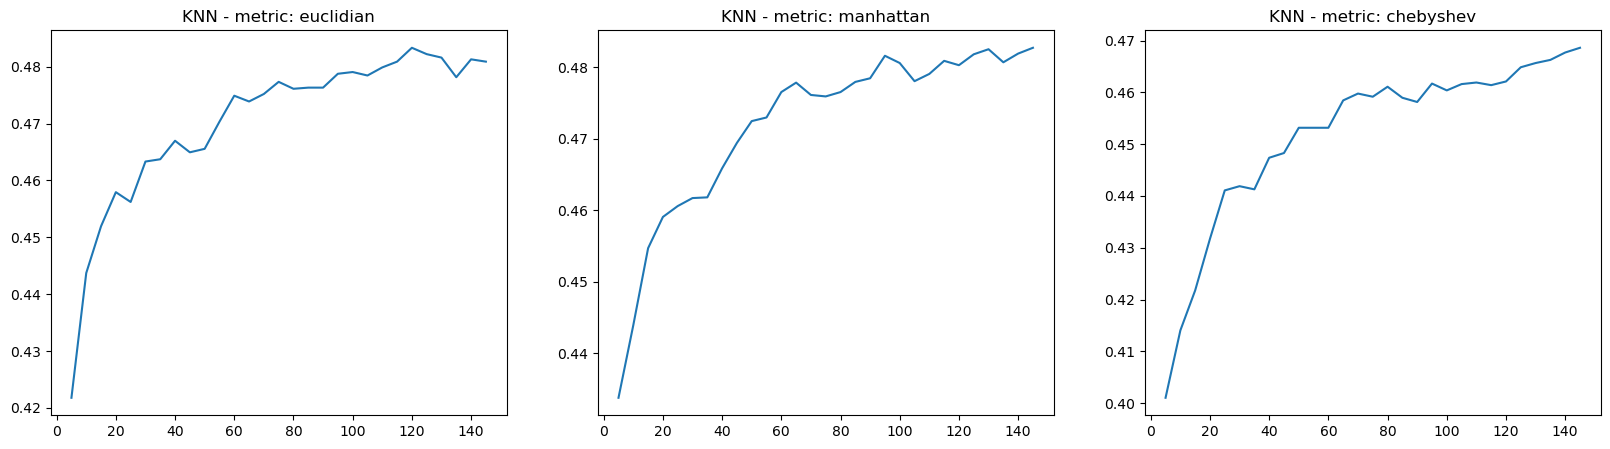

In [ ]:
euclidian = gs_knn.cv_results_['mean_test_score'][:len(n_neighbors)]
manhattan = gs_knn.cv_results_['mean_test_score'][len(n_neighbors):2*len(n_neighbors)]
chebyshev = gs_knn.cv_results_['mean_test_score'][2*len(n_neighbors):]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
ax1.plot(n_neighbors, euclidian)
ax1.set_title('KNN - metric: euclidian')
ax2.plot(n_neighbors, manhattan)
ax2.set_title('KNN - metric: manhattan')
ax3.plot(n_neighbors, chebyshev)
ax3.set_title('KNN - metric: chebyshev')

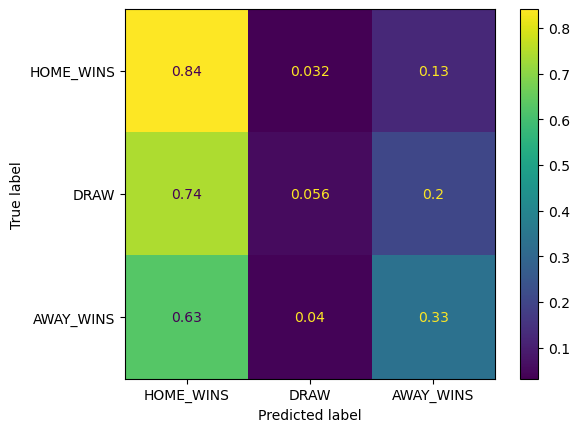

In [ ]:
y_pred = gs_knn.predict(X_test_scaled)
cm = confusion_matrix(y_test_encoded, y_pred, normalize='true')
ConfusionMatrixDisplay(cm, display_labels=['HOME_WINS', 'DRAW', 'AWAY_WINS']).plot()

Nous pouvons remarquer avec les figures ci-dessus l'évolution du score par rapport au nombre de voisins pour chaque métrique utilisé. Nous observons l'effet du overfitting quand nous avons un nombre des voisins faibles. C'est possible de remarquer aussi une stabilisation de l'évolution du score après 100 voisins.

### Regression Logistique

In [ ]:
log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_train_scaled, y_train_encoded)

LogisticRegression(max_iter=10000, random_state=42)

In [ ]:
y_pred = log_reg.predict(X_test_scaled)
score_reglog = accuracy_score(y_test_encoded, y_pred)
score_reglog

0.481511580658269

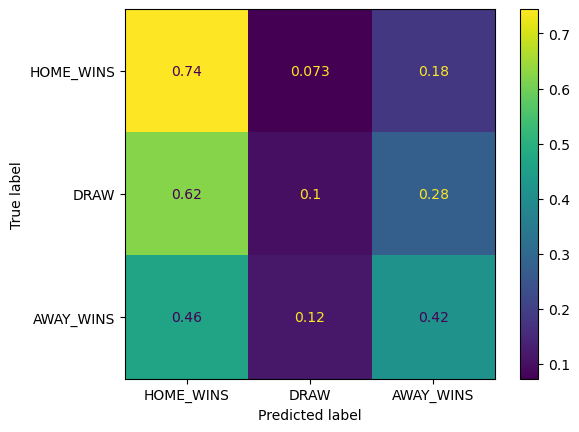

In [ ]:
cm_logreg = confusion_matrix(y_test_encoded, y_pred, normalize='true')
ConfusionMatrixDisplay(cm_logreg, display_labels=['HOME_WINS', 'DRAW', 'AWAY_WINS']).plot()

Regression Logistique avec optimisation des hyperparamètres

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  
    'solver': ['liblinear', 'saga'], 
    'penalty': ['l2'] 
}

In [ ]:
gs_log_reg = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
gs_log_reg.fit(X_train_scaled, y_train_encoded)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [ ]:
best_params = gs_log_reg.best_params_
print(f"Best parameters: {best_params}")
best_log_reg = gs_log_reg.best_estimator_ 
print(f"Best estimator: {best_log_reg}")

Best parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}
Best estimator: LogisticRegression(C=0.001, max_iter=10000, random_state=42, solver='saga')


In [ ]:
y_pred = gs_log_reg.predict(X_test_scaled)
score_reglog_hyp = accuracy_score(y_test_encoded, y_pred)
score_reglog_hyp

0.4965461194636327

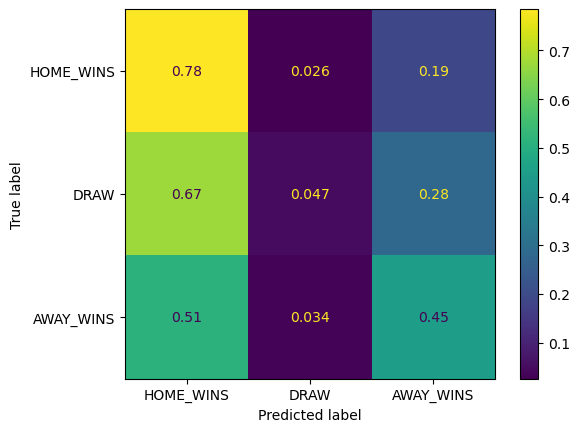

In [ ]:
cm_gs_logreg = confusion_matrix(y_test_encoded, y_pred, normalize='true')
ConfusionMatrixDisplay(cm_gs_logreg, display_labels=['HOME_WINS', 'DRAW', 'AWAY_WINS']).plot()

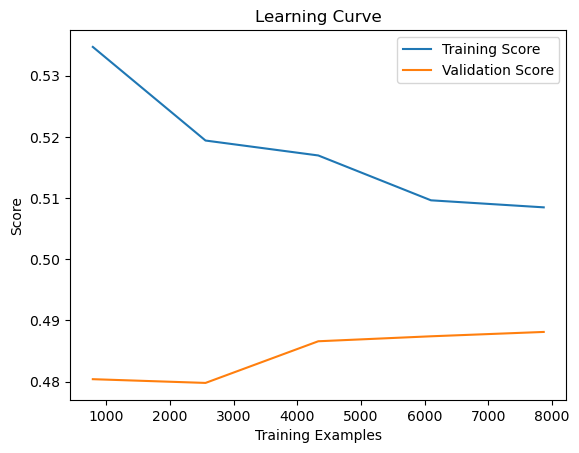

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    best_log_reg, X_train_scaled, y_train_encoded, cv=5
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend()
plt.title('Learning Curve')
plt.show()

### XGBoost

D'abord, nous allons fixer le taux d'apprentissage et chercher les autres paramètres

In [ ]:
xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eta=0.1,
    n_estimators=100,
    n_jobs=-1
)

param_grid_xgb = {
    'max_depth': [3, 6, 12],
    'reg_lambda': [0, 0.1, 0.5, 1, 2, 5],
    'reg_alpha': [0, 0.1, 0.5, 1, 2, 5]
}

gs_xgb = GridSearchCV(xgb, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=10).fit(X_train_imp, y_train_encoded)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[CV 2/5; 2/108] START max_depth=3, reg_alpha=0, reg_lambda=0.1..................[CV 4/5; 1/108] START max_depth=3, reg_alpha=0, reg_lambda=0....................
[CV 1/5; 1/108] START max_depth=3, reg_alpha=0, reg_lambda=0....................

[CV 1/5; 2/108] START max_depth=3, reg_alpha=0, reg_lambda=0.1..................
[CV 2/5; 1/108] START max_depth=3, reg_alpha=0, reg_lambda=0....................[CV 3/5; 1/108] START max_depth=3, reg_alpha=0, reg_lambda=0....................
[CV 5/5; 1/108] START max_depth=3, reg_alpha=0, reg_lambda=0....................

[CV 3/5; 2/108] START max_depth=3, reg_alpha=0, reg_lambda=0.1..................
[CV 3/5; 1/108] END max_depth=3, reg_alpha=0, reg_lambda=0;, score=0.487 total time=   2.3s
[CV 4/5; 2/108] START max_depth=3, reg_alpha=0, reg_lambda=0.1..................
[CV 1/5; 2/108] END max_depth=3, reg_alpha=0, reg_lambda=0.1;, score=0.493 total time=   2.4s
[CV 5/5; 1/108] END max_depth=3, reg_alpha=0, reg_lambda=0;, score=0.483 total time= 

In [ ]:
best_params_xgb_tmp = gs_xgb.best_params_
score_xgb_tmp = gs_xgb.score(imputer.transform(X_test), y_test_encoded)

print(f'{best_params_xgb_tmp=}')
print(f'{score_xgb_tmp=}')

best_params_xgb_tmp={'max_depth': 3, 'reg_alpha': 5, 'reg_lambda': 2}
score_xgb_tmp=0.4965461194636327


Maintenant, nous ajustons le taux d'apprentissage

In [ ]:
xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=100,
    n_jobs=-1,
    max_depth=best_params_xgb_tmp['max_depth'],
    reg_alpha=best_params_xgb_tmp['reg_alpha'],
    reg_lambda=best_params_xgb_tmp['reg_lambda'],
)

param_grid_xgb2 = {
    'eta': [0.01, 0.05, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.15, 0.22, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

gs_xgb_final = GridSearchCV(xgb, param_grid=param_grid_xgb2, cv=5, n_jobs=-1, verbose=10).fit(X_train_imp, y_train_encoded)

Fitting 5 folds for each of 22 candidates, totalling 110 fits
[CV 1/5; 1/22] START eta=0.01...................................................
[CV 2/5; 1/22] START eta=0.01...................................................
[CV 3/5; 1/22] START eta=0.01...................................................
[CV 4/5; 1/22] START eta=0.01...................................................
[CV 5/5; 1/22] START eta=0.01...................................................
[CV 1/5; 2/22] START eta=0.05...................................................
[CV 2/5; 2/22] START eta=0.05...................................................
[CV 3/5; 2/22] START eta=0.05...................................................
[CV 4/5; 1/22] END ....................eta=0.01;, score=0.482 total time=   2.4s
[CV 4/5; 2/22] START eta=0.05...................................................
[CV 1/5; 2/22] END ....................eta=0.05;, score=0.495 total time=   2.4s
[CV 2/5; 1/22] END ....................eta=0.01

In [ ]:
best_params_xgb = gs_xgb_final.best_params_
score_xgb = gs_xgb_final.score(imputer.transform(X_test), y_test_encoded)

print(f'{best_params_xgb=}')
print(f'{score_xgb=}')

best_params_xgb={'eta': 0.05}
score_xgb=0.49329540837058106


Nous allons analyser l'importance des variables sur cette modèle

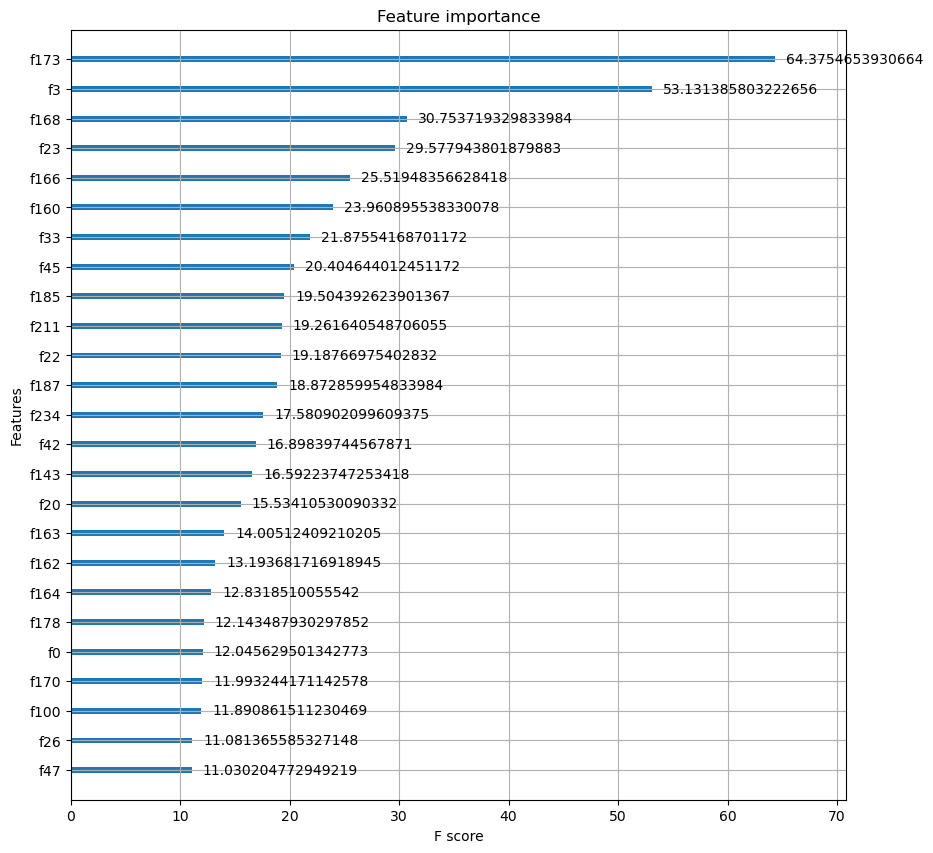

In [ ]:
plot_importance(gs_xgb_final.best_estimator_, max_num_features=25, importance_type='gain')
fig = plt.gcf()
fig.set_size_inches(10, 10)

In [ ]:
feat_import_idx = np.argsort(gs_xgb_final.best_estimator_.feature_importances_)[::-1]
sorted_feat_import = gs_xgb_final.best_estimator_.feature_importances_[feat_import_idx]

# retrieving features that have more than 1% of importance
most_import = sorted_feat_import[sorted_feat_import > 0.01]
cols_to_keep = X_train.columns[feat_import_idx[:len(most_import)]]

print(f"Nombre de colonnes avec plus de 1% d'importance: {len(cols_to_keep)}")

Nombre de colonnes avec plus de 1% d'importance: 17


Nous allons entraîner un nouvelle modèle en n'utilisant que les variables avec > 1% d'importance

In [ ]:
xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=100,
    n_jobs=-1,
    max_depth=best_params_xgb_tmp['max_depth'],
    reg_alpha=best_params_xgb_tmp['reg_alpha'],
    reg_lambda=best_params_xgb_tmp['reg_lambda'],
    eta=best_params_xgb['eta']
)

xgb = xgb.fit(
    pd.DataFrame(X_train_imp, columns=X_train.columns)[cols_to_keep],
    y_train_encoded)

In [ ]:
score_xgb_var_imp =  xgb.score(
    pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)[cols_to_keep],
    y_test_encoded)
print(f'{score_xgb_var_imp=}')

score_xgb_var_imp=0.49451442503047544


### Random Forest

RandomForestClassifier est un modèle robuste face aux valeurs manquantes et ne nécessite ni standardisation ni mise à l’échelle des données, car il ne repose sur aucune hypothèse concernant la distribution des caractéristiques ou l’échelle des valeurs.
Ainsi, l’imputation et la mise à l’échelle pourraient altérer la distribution originale des données, laquelle pourrait contenir des signaux utiles pour le modèle.
Par conséquent, nous utiliserons les données brutes (sans imputation, standardisation ni normalisation).

In [10]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_clf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='accuracy')

grid_search_rf.fit(X_train, y_train_encoded)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [11]:
best_params = grid_search_rf.best_params_
print("Best Parameters:", best_params)

best_rf_clf = grid_search_rf.best_estimator_
print("Best Estimator:", best_rf_clf)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Estimator: RandomForestClassifier(max_depth=10, n_estimators=150, random_state=42)


In [12]:
y_pred = grid_search_rf.predict(X_test)
score_rf = accuracy_score(y_test_encoded, y_pred)
score_rf

0.49410808614384394

On va analyser l'importance des variables pour le modèle Random Forest

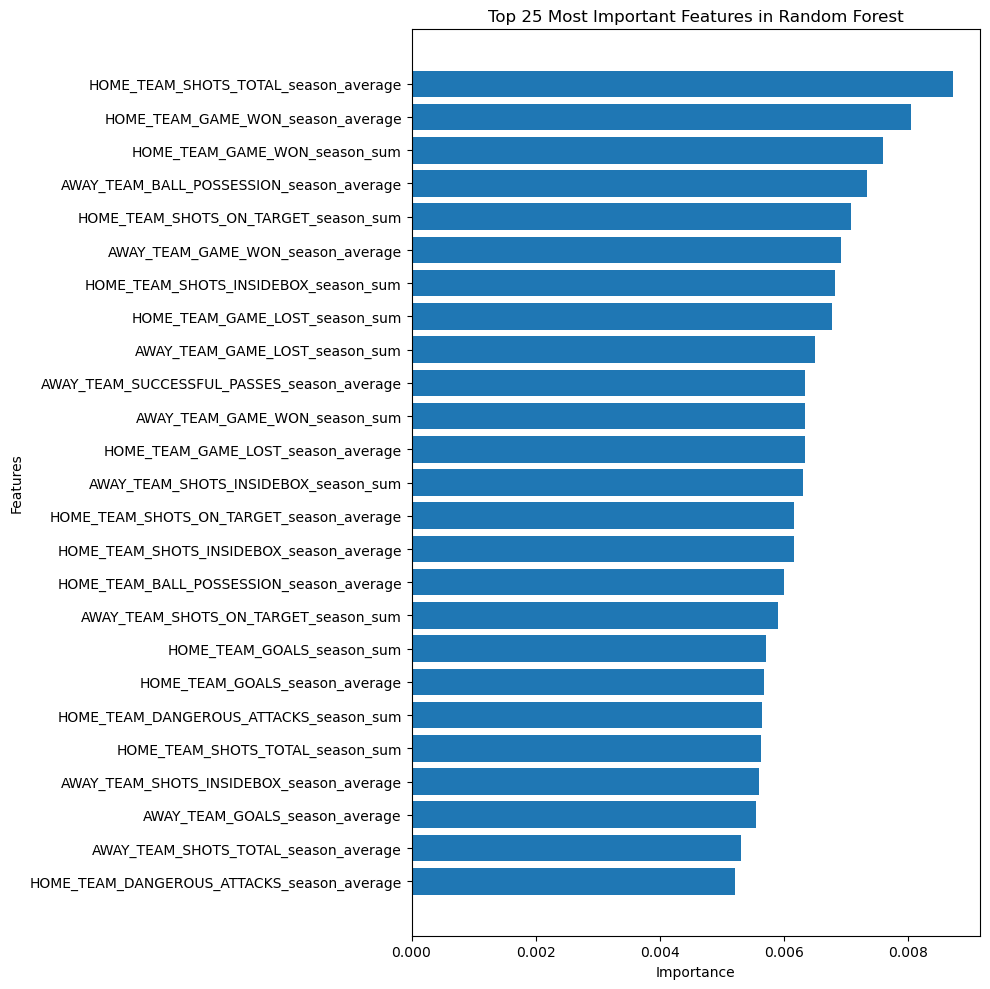

In [13]:
feature_importances = best_rf_clf.feature_importances_

feature_names = X_test.columns if isinstance(X_test, pd.DataFrame) else [f"Feature {i}" for i in range(len(feature_importances))]

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

max_num_features = 25
top_features = importance_df.head(max_num_features)

plt.figure(figsize=(10, 10))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title(f'Top {max_num_features} Most Important Features in Random Forest')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

Bien que aucune caractéristique ne soit dominante (elles ont toutes une importance inférieure à 1 %), certaines pourraient contenir des informations similaires. Pour identifier d'éventuelles redondances et simplifier le modèle, une analyse de corrélation entre les caractéristiques est réalisée.

In [ ]:
n_features = X_train.shape[1]
total_pairs = n_features * (n_features - 1) // 2

correlation_matrix = X_train.corr()
high_corr_pairs = np.sum(np.triu(correlation_matrix > 0.9, k=1))

percentage_high_corr = (high_corr_pairs / total_pairs) * 100

print(f"Nombre total de paires: {total_pairs}")
print(f"Nombre de paires avec une corrélation > 0,9: {high_corr_pairs}")
print(f"Pourcentage de paires fortement corrélées: {percentage_high_corr:.2f}%")


Nombre total de paires: 39060
Nombre de paires avec une corrélation > 0,9: 101
Pourcentage de paires fortement corrélées: 0.26%


L'analyse de corrélation montre que les caractéristiques sont faiblement corrélées, indiquant que la variance est répartie sur de nombreuses variables. Pour confirmer cette observation et/ou évaluer une éventuelle réduction de la dimensionnalité du jeu de données, j'applique une analyse en composantes principales (PCA) afin de déterminer le nombre de composantes nécessaires pour expliquer 95% de la variance.

In [34]:
pca = PCA(n_components=0.95) 
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Nombre de composantes principales: {X_train_pca.shape[1]}")

Nombre de composantes principales: 129


Le nombre de composantes principales nécessaires pour expliquer la variance est élevé, confirmant les résultats de l'analyse de corrélation: presque aucune caractéristique n'est redondante. Pour réduire davantage la dimensionnalité, je sélectionne et entraîne le modèle en utilisant uniquement les caractéristiques ayant une importance supérieure à 0,3%.

In [ ]:
threshold = 0.003  
important_features = importance_df[importance_df['Importance'] > threshold]

print(f"Nombre de features sélectionnées: {len(important_features)}")

selected_features = important_features['Feature'].tolist()

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


Nombre de features sélectionnées : 206


In [28]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_clf_selected = RandomForestClassifier(random_state=42)

grid_search_rf_selected = GridSearchCV(estimator=rf_clf_selected, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='accuracy')

grid_search_rf_selected.fit(X_train_selected, y_train_encoded)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [29]:
best_params_selected = grid_search_rf_selected.best_params_
print("Best Parameters:", best_params_selected)

best_rf_clf_selected = grid_search_rf_selected.best_estimator_
print("Best Estimator:", best_rf_clf_selected)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Best Estimator: RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=150,
                       random_state=42)


In [32]:
y_pred_selected = grid_search_rf_selected.predict(X_test_selected)
score_rf_selected = accuracy_score(y_test_encoded, y_pred_selected)
score_rf_selected

0.4937017472572125

Random Forest with no Bootstrap

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_clf_nb = RandomForestClassifier(random_state=42, bootstrap=False)

grid_search_rf_nb = GridSearchCV(estimator=rf_clf_nb, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='accuracy')

grid_search_rf_nb.fit(X_train, y_train_encoded)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(bootstrap=False, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [ ]:
best_params_nb = grid_search_rf_nb.best_params_
print("Best Parameters:", best_params_nb)

best_rf_clf_nb = grid_search_rf_nb.best_estimator_
print("Best Estimator:", best_rf_clf_nb)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Estimator: RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=2,
                       random_state=42)


In [ ]:
y_pred = grid_search_rf_nb.predict(X_test)
score_rf_nb = accuracy_score(y_test_encoded, y_pred)
score_rf_nb

0.4965461194636327

### LightGBM

In [ ]:
lgb = LGBMClassifier(
    objective='multiclass',
    n_jobs=-1,
    learning_rate=0.1,
    verbosity=-1)

param_grid_lgb = {
    'num_leaves': [3, 4, 5, 6, 7],
    'min_child_samples': [10, 20, 50, 70, 100, 200]
}

gs_lgb = GridSearchCV(lgb, param_grid=param_grid_lgb, cv=5, verbose=10).fit(X_train_imp, y_train_encoded)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5; 1/30] START min_child_samples=10, num_leaves=3.........................
[CV 1/5; 1/30] END min_child_samples=10, num_leaves=3;, score=0.496 total time=   1.0s
[CV 2/5; 1/30] START min_child_samples=10, num_leaves=3.........................
[CV 2/5; 1/30] END min_child_samples=10, num_leaves=3;, score=0.499 total time=   0.5s
[CV 3/5; 1/30] START min_child_samples=10, num_leaves=3.........................
[CV 3/5; 1/30] END min_child_samples=10, num_leaves=3;, score=0.491 total time=   0.6s
[CV 4/5; 1/30] START min_child_samples=10, num_leaves=3.........................
[CV 4/5; 1/30] END min_child_samples=10, num_leaves=3;, score=0.480 total time=   0.6s
[CV 5/5; 1/30] START min_child_samples=10, num_leaves=3.........................
[CV 5/5; 1/30] END min_child_samples=10, num_leaves=3;, score=0.493 total time=   0.5s
[CV 1/5; 2/30] START min_child_samples=10, num_leaves=4.........................
[CV 1/5; 2/30] EN

/home/leonardo/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
score_lgb = gs_lgb.score(X_test, y_test_encoded)

print(f'{gs_lgb.best_params_=}')
print(f'{score_lgb=}')

## Analyse du Score

In [ ]:
pd.DataFrame(
    {'score': [score_knn, score_xgb, score_xgb_var_imp, score_lgb, score_reglog, score_reglog_hyp, score_rf, score_rf_nb, score_rf_selected]},  
    index=['KNN Score', 'XGB Score', 'XGB Variable Importance Score', 'LGBM Score', 'Reg Logistique Score',
            'Reg Logistique Opt Hyparam', 'Random Forest Score', 'Random Forest No Bootstrap Score', 
            'Random Forest Selected Features']).sort_values(by='score', ascending=False)

## Sousmissions

In [ ]:
data_final = data.drop(columns=['ID', 'HOME_LEAGUE', 'HOME_TEAM_NAME', 'AWAY_LEAGUE', 'AWAY_TEAM_NAME'])
target_encoded = target.drop(columns='ID').apply(lambda x: np.where(x.to_numpy() == 1)[0][0], axis=1)

In [ ]:
final_imputer = SimpleImputer(strategy='median').fit(data_final)
data_imp = final_imputer.transform(data_final)

final_scaler = StandardScaler().fit(data_imp)
data_scaled = scaler.transform(data_imp)

In [ ]:
def generate_test_submission(model, imputer=None, scaler=None, cols_to_keep=None):
    path_team_away_test = f'{base_path}/Test_Data/test_away_team_statistics_df.csv'
    path_team_home_test = f'{base_path}/Test_Data/test_home_team_statistics_df.csv'

    test_team_home = pd.read_csv(path_team_home_test, sep=',')
    test_team_away = pd.read_csv(path_team_away_test, sep=',')

    test_team_home.columns = 'HOME_' + test_team_home.columns
    test_team_away.columns = 'AWAY_' + test_team_away.columns

    test_team =  pd.concat([test_team_home, test_team_away.iloc[:, 1:]],join='inner',axis=1)
    X_test = test_team.rename(columns={'HOME_ID':'ID'})

    X_test_id = X_test['ID']
    X_test = X_test.drop(columns=['ID'])
    original_columns = X_test.columns

    if imputer is not None:
        X_test = imputer.transform(X_test)

    if scaler is not None:
        X_test = scaler.transform(X_test)

    if cols_to_keep is not None:
        X_test = pd.DataFrame(X_test, columns=original_columns)[cols_to_keep]

    predictions = model.predict(X_test)        

    p = []
    for pred in predictions:
        _p = np.zeros(3, dtype=np.int32)
        _p[pred] = 1
        p.append(_p)

    pred_sub = pd.DataFrame(data=p, columns=['HOME_WINS', 'DRAW', 'AWAY_WINS'])
    pred_sub = pd.concat([X_test_id, pred_sub],join='inner',axis=1)

    return pred_sub

In [ ]:
lgbm_sub = generate_test_submission(
    model=LGBMClassifier(
        objective='multiclass',
        n_jobs=-1,
        learning_rate=0.1,
        verbosity=-1,
        min_child_samples=10, 
        num_leaves=3
    ).fit(data_imp, target_encoded),
    imputer=final_imputer
)
lgbm_sub.to_csv('./submission_lgbm.csv', index=False)

In [ ]:
xgb_var_import_sub = generate_test_submission(xgb, imputer=imputer, cols_to_keep=cols_to_keep)
xgb_var_import_sub.to_csv('./submission_xgb_var.csv', index=False)

In [ ]:
reg_log_sub = generate_test_submission(log_reg, imputer=imputer, scaler=scaler)
reg_log_sub.to_csv('./submission_reglog.csv', index=False)

In [ ]:
gs_log_reg_sub = generate_test_submission(gs_log_reg, imputer=imputer, scaler=scaler)
gs_log_reg_sub.to_csv('./submission_reglog_var.csv', index=False)

In [ ]:
grid_search_rf_nb_sub = generate_test_submission(grid_search_rf)
grid_search_rf_nb_sub.to_csv('./submission_randomforest.csv', index=False)

In [ ]:
grid_search_rf_nb_sub = generate_test_submission(grid_search_rf_nb)
grid_search_rf_nb_sub.to_csv('./submission_randomforest_nobootstrap.csv', index=False)

In [ ]:
grid_search_rf_selected = generate_test_submission(grid_search_rf_selected)
grid_search_rf_selected.to_csv('./submission_randomforest_feature_sel.csv', index=False)